# Pill 15 - Linear models

Outline:

+ Ordinary least squares regression
+ Logistic regression
+ Generalized additive models
+ Support Vector Machines


# Ordinary least squares regression

We have seen linear models before several times. Let us recall what they are about. The underlying model is a linear one, this is

$$h(x) = a^Tx + b$$

In the context of regression, the use of this model can be associated to the minimization of the squared mean error loss, this is

$$
\begin{align}
\underset{a,b}{\text{minimize}} &\quad \sum_i (y_i - h(x_i;a,b))^2
\end{align}$$


As we saw in other notebooks, this problem can be easily solved using iterative approaches or even using a closed form solution.



# Logistic regression

Logistic regression is a **linear classifier** that is based on maximum likelihood principles to jointly model the classification boundary and the certainty of the fit. It is based on fitting a logistic function to the data.

$$p(x_i|y) = \frac{1}{1+e^{-(a^Tx+b)}}$$

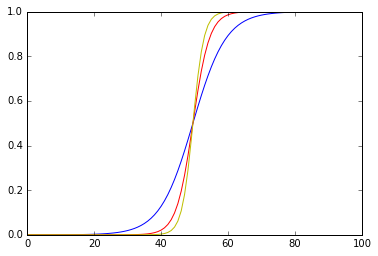

In [9]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-10,10,100)

beta= 1.
p = 1./(1+np.exp(-beta*x)) 
plt.plot(p)


beta= 2.
p2 = 1./(1+np.exp(-beta*x)) 
plt.plot(p2,"r")

beta= 3.
p3 = 1./(1+np.exp(-beta*x)) 
plt.plot(p3,"y")

<div class = "alert alert-success" style ="border-radius:10px">**EXERCISE: ** Change the value of $\beta$ and describe its effect.</div>


more slope

<div class = "alert alert-success" style = "border-radius:10px"> **EXERCISE: ** What are hypothesis with respect to the probability modeling?</div>

The **likelihood function** can be written as

$$p(x|y) = \prod\limits_{i=1}^N p(x_i|y)^{y_i}(1-p(x_i|y))^{1-y_i}$$

and the goal is to 

$$\text{maximize} \quad p(x|y)$$

Taking the logarithm, we can equivalently maximize

$$\text{maximize} \quad \sum_i y_i \ln p(x_i|y) + (1-y_i) \ln(1-p(x_i|y))$$



We can model the probability $p(x_i|x)$ with a **logit function**, i.e.

$$p(x_i|y) = \ell(x_i) =  \frac{1}{1+e^{-(a^Tx+b)}}$$

In order to optimize this model let us write the derivative of the logit function,

$$\frac{\partial \ell}{\partial a} =  (1+e^{-(a^Tx+b)})^{-2}e^{-(a^Tx+b)}x$$
$$\frac{\partial \ell}{\partial b} =  (1+e^{-(a^Tx+b)})^{-2}e^{-(a^Tx+b)}$$


In terms of the loss function the gradient with respect to the parameters is

$$\nabla_a \mathcal{L} = \sum_i x_i \ell(x_i)(y_i e^{-(a^Tx_i+b)} - (1-y_i) )  $$
$$\nabla_b \mathcal{L} = \sum_i  \ell(x_i)(y_i e^{-(a^Tx_i+b)} - (1-y_i) )  $$

Let us solve this using gradient descent:

[[1, 0.5], [0.5, 1]]
(200, 2) (200,)


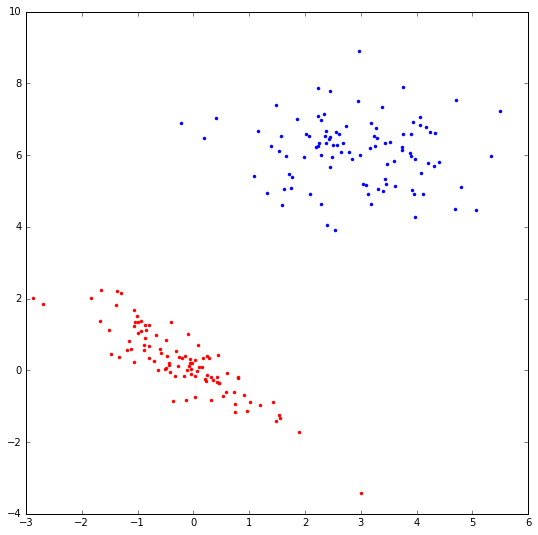

In [13]:
%matplotlib inline
import numpy as np
m1 = [0.,0.]
s1 = [[1,-0.9],[-0.9,1]]
m2 = [3.,6.]
s2 = [[1,0],[0,1]]
m3 = [4.,-1.]
s3 = [[1,0.5],[0.5,1]]
print s3
c1 = np.random.multivariate_normal(m1,s1,100)
c2 = np.random.multivariate_normal(m2,s2,100)

x= np.r_[c1,c2]
y= np.r_[np.zeros(c1.shape[0]),np.ones(c2.shape[0])]

print x.shape,y.shape
import matplotlib.pyplot as plt

plt.plot(c1[:,0],c1[:,1],'r.')
plt.plot(c2[:,0],c2[:,1],'b.')

plt.gcf().set_size_inches((9,9))

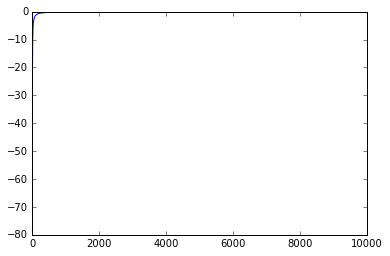

In [17]:
#gradient descent

def logit(x,a,b):
    return 1./(1+np.exp(-(np.sum(a*x,axis=1)+b)))

def evaluate_objective(x,y,a,b):
    return np.sum(y*np.log(logit(x,a,b))+(1-y)*np.log((1-logit(x,a,b))))
    
def partial_a_objective(x,y,a,b):
    partial = x*np.tile((y*np.exp(-(np.sum(a*x,axis=1)+b))*logit(x,a,b)-(1-y)*logit(x,a,b))[:,np.newaxis],(1,2))
    return np.sum(partial,axis=0)

def partial_b_objective(x,y,a,b):
    partial = (y*np.exp(-(np.sum(a*x,axis=1)+b))*logit(x,a,b)-(1-y)*logit(x,a,b))
    return np.sum(partial)

n_iters = 10000
nu=0.01
a = np.random.rand(1,x.shape[1])
b = np.random.rand(1)
conv = []
for i in xrange(n_iters):
    at = a + nu*partial_a_objective(x,y,a,b) #maximize
    b = b + nu*partial_b_objective(x,y,a,b)  #maximize
    a = at
    conv.append(evaluate_objective(x,y,a,b))
plt.plot(conv)


In [18]:
print a,b

[[ 2.97757287  2.76565901]] [-9.65833488]


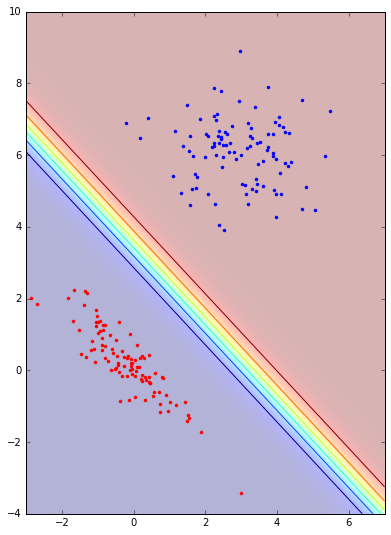

In [19]:
#my code
xx,yy = np.meshgrid(np.linspace(-3,7,200),np.linspace(-4,10,200))
viz=np.c_[xx.ravel(),yy.ravel()]


z = logit(viz,a,b)

plt.plot(c1[:,0],c1[:,1],'r.')
plt.plot(c2[:,0],c2[:,1],'b.')
plt.gca().set_xlim([-3.,7.])
plt.gca().set_ylim([-4.,10.])
plt.imshow(z.reshape((200,200)), interpolation='bilinear', origin='lower', extent=(-3,7,-4,10),alpha=0.3, vmin=0, vmax=1)
plt.contour(xx,yy,z.reshape((200,200)))

plt.gcf().set_size_inches((9,9))

(200, 2) (200,)


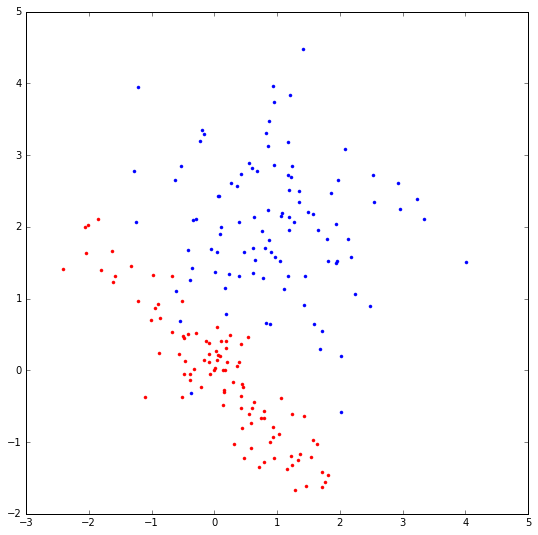

In [20]:
%matplotlib inline
import numpy as np
m1 = [0.,0.]
s1 = [[1,-0.9],[-0.9,1]]
m2 = [1.,2.]
s2 = [[1,0],[0,1]]
c1 = np.random.multivariate_normal(m1,s1,100)
c2 = np.random.multivariate_normal(m2,s2,100)


x= np.r_[c1,c2]
y= np.r_[np.zeros(c1.shape[0]),np.ones(c2.shape[0])]


print x.shape,y.shape
import matplotlib.pyplot as plt


plt.plot(c1[:,0],c1[:,1],'r.')
plt.plot(c2[:,0],c2[:,1],'b.')


plt.gcf().set_size_inches((9,9))

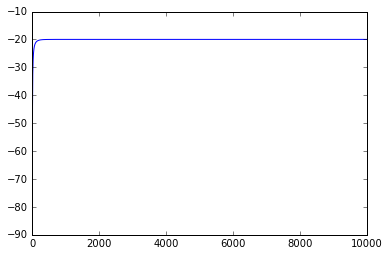

In [21]:
#gradient descent

def logit(x,a,b):
    return 1./(1+np.exp(-(np.sum(a*x,axis=1)+b)))

def evaluate_objective(x,y,a,b):
    return np.sum(y*np.log(logit(x,a,b))+(1-y)*np.log((1-logit(x,a,b))))
    
def partial_a_objective(x,y,a,b):
    partial = x*np.tile((y*np.exp(-(np.sum(a*x,axis=1)+b))*logit(x,a,b)-(1-y)*logit(x,a,b))[:,np.newaxis],(1,2))
    return np.sum(partial,axis=0)

def partial_b_objective(x,y,a,b):
    partial = (y*np.exp(-(np.sum(a*x,axis=1)+b))*logit(x,a,b)-(1-y)*logit(x,a,b))
    return np.sum(partial)


n_iters = 10000
nu=0.01
a = np.random.rand(1,x.shape[1])
b = np.random.rand(1)
conv = []
for i in xrange(n_iters):
    at = a + nu*partial_a_objective(x,y,a,b) #maximize
    b = b + nu*partial_b_objective(x,y,a,b) #maximize
    a = at
    conv.append(evaluate_objective(x,y,a,b))
    

plt.plot(conv)

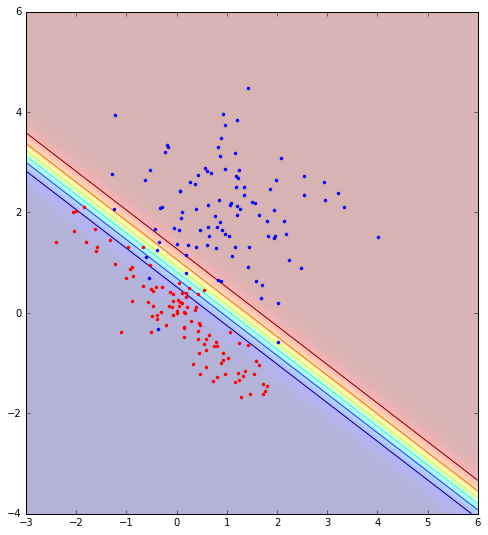

In [22]:
#my code
xx,yy = np.meshgrid(np.linspace(-3,6,200),np.linspace(-4,6,200))
viz=np.c_[xx.ravel(),yy.ravel()]


z = logit(viz,a,b)

plt.plot(c1[:,0],c1[:,1],'r.')
plt.plot(c2[:,0],c2[:,1],'b.')
plt.gca().set_xlim([-3.,6.])
plt.gca().set_ylim([-4.,6.])
plt.imshow(z.reshape((200,200)), interpolation='bilinear', origin='lower', extent=(-3,6,-4,6),alpha=0.3, vmin=0, vmax=1)
plt.contour(xx,yy,z.reshape((200,200)))

plt.gcf().set_size_inches((9,9))

# Support vector machines
Support Vector Machines (SVM) is a prototypical example of discriminative learning. In this setting one explicitly assumes a function model class of the boundary. The classical model for SVM is a linear model. SVM is not the only discriminative linear model, e.g. perceptron, logistic classifier, etc. But, it is probably the most complete problem formulation.

Let us first check the intuition behind SVM,

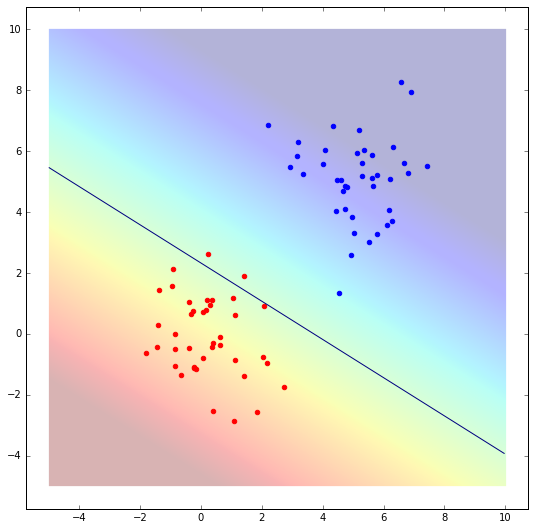

In [23]:
%matplotlib inline
%reset -f
import numpy as np
import matplotlib.pyplot as plt
from IPython.html.widgets import interact

class HLA():
    def __init__(self):
        np.random.seed(1)
        self.X = np.concatenate([1.25*np.random.randn(40,2),5+1.5*np.random.randn(40,2)]) 
        self.y = np.concatenate([np.ones((40,1)),-np.ones((40,1))])
        plt.scatter(self.X[0:40,0],self.X[0:40,1],color='r')
        plt.scatter(self.X[40:,0],self.X[40:,1],color='b') 
        delta = 0.025
        xx = np.arange(-5.0, 10.0, delta)
        yy = np.arange(-5.0, 10.0, delta)
        XX, YY = np.meshgrid(xx, yy)
        Xf = XX.flatten()
        Yf = YY.flatten()
        self.sz=XX.shape
        self.data = np.concatenate([Xf[:,np.newaxis],Yf[:,np.newaxis]],axis=1);

    def run(self,w0,w1,offset):
        w=np.array([w0,w1])
        w.shape=(2,1)
        Z = self.data.dot(w)+offset
        Z.shape=self.sz
        plt.scatter(self.X[0:40,0],self.X[0:40,1],color='r')
        plt.scatter(self.X[40:,0],self.X[40:,1],color='b')
        plt.imshow(Z, interpolation='bilinear', origin='lower', extent=(-5,10,-5,10),alpha=0.3, vmin=-30, vmax=30)
        XX = self.data[:,0].reshape(self.sz)
        YY = self.data[:,1].reshape(self.sz)
        plt.contour(XX,YY,Z,[0])
        fig = plt.gcf()
        fig.set_size_inches(9,9)

def decorator(w0,w1,offset):
    widget_hla.run(w0,w1,offset)
    
widget_hla = HLA()
interact(decorator, w0=(-10.,10.), w1=(-10.,10.), offset=(-20.,40.));

<div class = "alert alert-success">**QUESTION:** Using the former widget, check manually the following configurations:

<li> $(w_0,w_1,\text{offset}) = (-1.7, -3.1, 10)$
<li> $(w_0,w_1,\text{offset}) = (-3.7, -0.5, 10.3)$
<li> $(w_0,w_1,\text{offset}) = (-7.5, -3.2, 28.8)$
<p>
Which one of those configuration do you think yields a better boundary? Why?
</div>

<div class="alert alert-info">
**INTUITION:** The Support Vector Machine classifer finds the boundary with maximum distance/**margin** to both classes.</div>

Observations:
- It implicitly models the notion of noise. One expects that the boundary with maximum margin will be robust to small perturbations in the data.
- A maximum margin classifier has a unique solution in the separable case.

Number of support vectors: 3
(w0,w1) = [-7.58277576 -3.19765261]
offset = 28.697647408


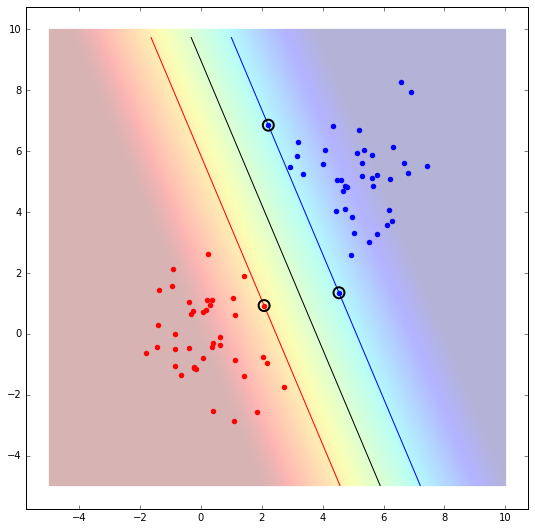

In [47]:

%reset -f
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from IPython.html.widgets import interact
from sklearn import svm

class svm_example():
    def __init__(self):
        '''Data creation'''
        np.random.seed(1)
        self.X = np.concatenate([1.25*np.random.randn(40,2),5+1.5*np.random.randn(40,2)]) 
        self.y = np.concatenate([np.ones((40,1)),-np.ones((40,1))])

    def run(self):
        '''Fit a linear SVM'''
        self.clf = svm.SVC(kernel='linear')
        self.clf.fit(self.X,self.y.ravel())
        
    def display(self):
        '''Display stuff'''
        delta = 0.25
        xx = np.arange(-5.0, 10.0, delta)
        yy = np.arange(-5.0, 10.0, delta)
        XX, YY = np.meshgrid(xx, yy)
        Xf = XX.flatten()
        Yf = YY.flatten()
        sz=XX.shape
        data = np.concatenate([Xf[:,np.newaxis],Yf[:,np.newaxis]],axis=1);
        Z=self.clf.decision_function(data)
        Z.shape=sz
        plt.scatter(self.X[0:40,0],self.X[0:40,1],color='r')
        plt.scatter(self.X[40:,0],self.X[40:,1],color='b')
        plt.imshow(Z, interpolation='bilinear', origin='lower', extent=(-5,10,-5,10),alpha=0.3, vmin=-3, vmax=3)
        XX = data[:,0].reshape(sz)
        YY = data[:,1].reshape(sz)
        plt.contour(XX,YY,Z,[-1,0,1],colors=['b','k','r'])
        fig = plt.gcf()
        fig.set_size_inches(9,9)
        print 'Number of support vectors: ' + str(np.sum(self.clf.n_support_))
        plt.scatter(self.clf.support_vectors_[:, 0], 
           self.clf.support_vectors_[:, 1], 
           s=120, 
           facecolors='none', 
           linewidths=2,
           zorder=10)
        print '(w0,w1) = ' + str(10*self.clf.coef_[0])
        print 'offset = ' + str(10*self.clf.intercept_[0])
        return XX,YY,Z



c = svm_example()
c.run()
XX,YY,Z=c.display()

Observe that there is a critical subset of data points. These are called **Support Vectors**. If any of those points disappear the boundary changes.  The decision boundary depends on the support vectors, thus we have to store them in our model.

Check the intuition in 3D:

<function __main__.control3D>

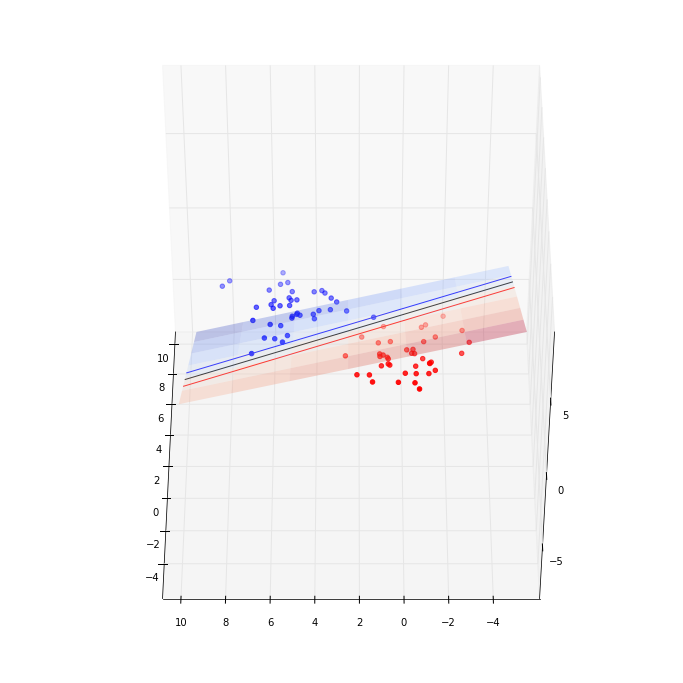

In [48]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
np.random.seed(1)
X = np.concatenate([1.25*np.random.randn(40,2),5+1.5*np.random.randn(40,2)]) 
y = np.concatenate([np.ones((40,1)),-np.ones((40,1))])
def control3D(elevation,azimuth):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    fig.set_size_inches(12,12)
    ax.plot_surface(XX,YY,Z,cmap=cm.coolwarm,alpha=0.3,linewidth=0)
    ax.scatter(X[0:40,0],X[0:40,1],1,color='r')
    ax.scatter(X[40:,0],X[40:,1],-1,color='b')
    ax.contour(XX,YY,Z,[-1,0,1],colors=['b','k','r'])
    ax.view_init(elev=elevation, azim=azimuth)

#Ipython 2.0
interact(control3D,elevation=(0.,90.),azimuth=(0,360))
#Ipython 1.1
#elevation = 45
#azimuth = 180
#control3D(elevation,azimuth)

<div class = "alert alert-success">**QUESTIONS: **
<li> Set the azimuth to $113$ and elevation to $0$. Observe the data points and the relative position of the hyperplane. 
<li> Change the elevation to $90$. Describe this projection.
</div>

### 3.1.1 Geometry of the hyperplane
A hyperplane in ${\bf R}^d$ is defined as an affine combination of the variables: $\pi\equiv a^Tx + b = 0$. 

Features:

+ A hyperplane splits the space in two half-spaces. The evaluation of the equation of the hyperplane on any element of one of the half-space is a positive value. It is a negative value for all the elements in the other half-space.
+ The distance of a point $x \in{\bf R}^d$ to the hyperplane $\pi$ is 
$$d(x,\pi)=\frac{a^Tx+b}{\|a\|_2}$$


### 3.1.2 Modeling the separating hyperplane
Given a binary classification problem with training data $\mathcal{D}=\{(x_i,y_i)\},\; i=1\dots N, \; y_i\in\{+1,-1\} $. Consider $\mathcal{S} \subseteq \mathcal{D}$ the subset of all data points belonging to class $+1$, $\mathcal{S}=\{x_i | y_i=+1\}$, and $\mathcal{R}=\{x_i | y_i=-1\}$ its complement. 

Then the problem of finding a separating hyperplane consists of fulfilling the following constraints

$$a^Ts_i+b>0\; \text{and}\; a^Tr_i+b<0 \quad \forall s_i\in\mathcal{S}, r_i\in\mathcal{R}.$$

Note the strict inequalities in the formulation. Informally, we can consider the smallest satisfied constraint. And observe that the rest must be satisfied with a larger value. Thus, we can arbitrarily set that value to 1 and rewrite the problem as $$a^Ts_i+b\geq 1\; \text{and}\; a^Tr_i+b\leq -1.$$

This is a *feasibility problem* and it is usually written in the following way in optimization standard notation

$$
\begin{align}
\text{minimize} & 1\\
\text{subject to} & a^T r_i + b \leq -1,\; \forall r_i \in \mathcal{R}\\
& a^T s_i + b \geq 1\; \forall s_i \in \mathcal{S}
\end{align}
$$

or in a compact way

$$
\begin{align}
\text{minimize} & 1\\
\text{subject to} & y_i (a^T x_i + b) \geq 1,\; \forall x_i \in \mathcal{D}\\
\end{align}
$$

The solution of this problem is not unique, e.g. remember all the parameters of the 'Human Learning Algorithm'.  

[[1, 0.5], [0.5, 1]]
(200, 2) (200,)


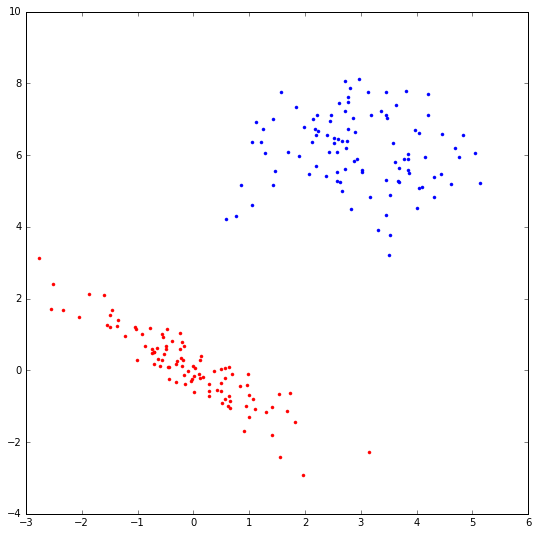

In [49]:
%matplotlib inline
import numpy as np
m1 = [0.,0.]
s1 = [[1,-0.9],[-0.9,1]]
m2 = [3.,6.]
s2 = [[1,0],[0,1]]
m3 = [4.,-1.]
s3 = [[1,0.5],[0.5,1]]
print s3
c1 = np.random.multivariate_normal(m1,s1,100)
c2 = np.random.multivariate_normal(m2,s2,100)


x= np.r_[c1,c2]
y= np.r_[-np.ones(c1.shape[0]),np.ones(c2.shape[0])]


print x.shape,y.shape
import matplotlib.pyplot as plt


plt.plot(c1[:,0],c1[:,1],'r.')
plt.plot(c2[:,0],c2[:,1],'b.')


plt.gcf().set_size_inches((9,9))

In [50]:
from cvxpy import *
import numpy

d = x.shape[1]
N = x.shape[0]

# Construct the problem.
a = Variable(d)
b = Variable()
error = 1.
obj = Minimize(error)
constraints = [mul_elemwise(y,x*a+b)>=1]
prob = Problem(obj,constraints)
prob.solve()

1.0

In [51]:
prob.status

'optimal'

In [52]:
a.value, b.value

(matrix([[ 2.18098634],
         [ 2.58581768]]), -7.4021516960177784)

<div class = "alert alert-success" style = "border-radius:10px"> **EXERCISE: ** Fill the blank with the model function to predict the boundary</div>

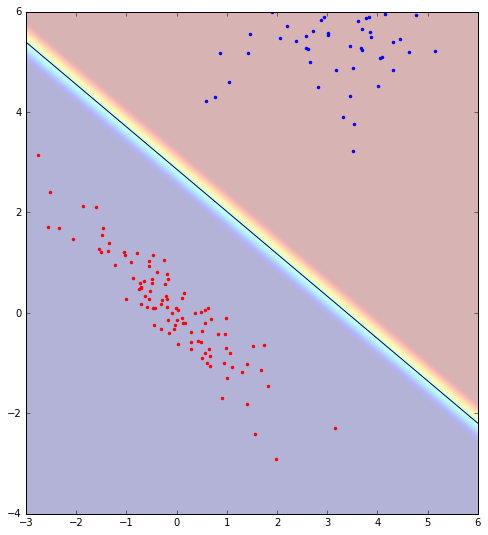

In [53]:
#your code
xx,yy = np.meshgrid(np.linspace(-3,6,200),np.linspace(-4,6,200))
viz=np.c_[xx.ravel(),yy.ravel()]



z = np.dot(viz, a.value) + b.value    # PUT HERE YOUR CODE


plt.plot(c1[:,0],c1[:,1],'r.')
plt.plot(c2[:,0],c2[:,1],'b.')
plt.gca().set_xlim([-3.,6.])
plt.gca().set_ylim([-4.,6.])
plt.imshow(z.reshape((200,200)), interpolation='bilinear', origin='lower', extent=(-3,6,-4,6),alpha=0.3, vmin=-1, vmax=1)
plt.contour(xx,yy,z.reshape((200,200)),[0.])

plt.gcf().set_size_inches((9,9))

### 3.1.3 The maximum margin hyperplane

Selecting the maximum margin hyperplane requires to add a new constraint to our problem. Remember from the geometry of the hyperplane that the distance of any point to a hyperplane is given by $d(x,\pi)=\frac{a^Tx+b}{\|a\|_2}$. 

Recall that we want positive data to be beyond value 1 and negative data below -1. Thus, what is the distance value we want to maximize?

The positive point closest to the boundary is at $1/\|a\|_2$ and the negative point closest to the boundary data point is also at $1/\|a\|_2$. Thus data points from different classes are at least $2/\|a\|_2$ apart. 

Recall that our goal is to find the separating hyperplane with maximum margin, i.e. with maximum distance among elements from different classes. Thus, we can complete the former formulation with our last requirement as follows

$$
\begin{align}
\text{maximize} & \quad 2/\|a\|_2 \\
\text{subject to} & \quad y_i (a^T x_i + b) \geq 1,\; \forall x_i \in \mathcal{D}\\
\end{align}
$$

or equivalently,

$$
\begin{align}
\text{minimize} & \quad \|a\|_2/2 \\
\text{subject to} & \quad y_i (a^T x_i + b) \geq 1,\; \forall x_i \in \mathcal{D}\\
\end{align}
$$

This formulation has a solution as long as the problem is linearly separable.

<div class = "alert alert-success">**EXERCISE: ** Code the hard margin SVM.</div>

[[1, 0.5], [0.5, 1]]
(200, 2) (200,)


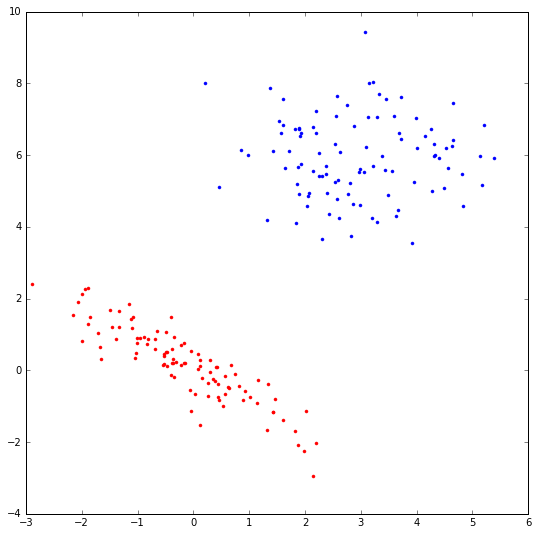

In [60]:
%matplotlib inline
import numpy as np
m1 = [0.,0.]
s1 = [[1,-0.9],[-0.9,1]]
m2 = [3.,6.]
s2 = [[1,0],[0,1]]
m3 = [4.,-1.]
s3 = [[1,0.5],[0.5,1]]
print s3
c1 = np.random.multivariate_normal(m1,s1,100)
c2 = np.random.multivariate_normal(m2,s2,100)


x= np.r_[c1,c2]
y= np.r_[-np.ones(c1.shape[0]),np.ones(c2.shape[0])]


print x.shape,y.shape
import matplotlib.pyplot as plt


plt.plot(c1[:,0],c1[:,1],'r.')
plt.plot(c2[:,0],c2[:,1],'b.')


plt.gcf().set_size_inches((9,9))

In [65]:
#Your code here

from cvxpy import *
import numpy

d = x.shape[1]
N = x.shape[0]

# Construct the problem.
a = Variable(d)
b = Variable()
error = norm(a)/2.
obj = Minimize(error)
constraints = [mul_elemwise(y,x*a+b)>=1]
prob = Problem(obj,constraints)
prob.solve()

0.3120240350847451

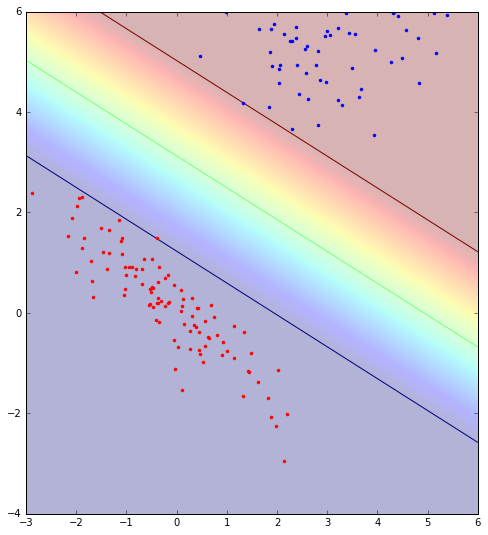

In [66]:
xx,yy = np.meshgrid(np.linspace(-3,6,200),np.linspace(-4,6,200))
viz=np.c_[xx.ravel(),yy.ravel()]


z = np.dot(viz,a.value)+b.value

plt.plot(c1[:,0],c1[:,1],'r.')
plt.plot(c2[:,0],c2[:,1],'b.')
plt.gca().set_xlim([-3.,6.])
plt.gca().set_ylim([-4.,6.])
plt.imshow(z.reshape((200,200)), interpolation='bilinear', origin='lower', extent=(-3,6,-4,6),alpha=0.3, vmin=-1, vmax=1)
plt.contour(xx,yy,z.reshape((200,200)),[-1.,0.,1.])

plt.gcf().set_size_inches((9,9))

In [67]:
# error are those points in the support vector

### 3.1.4 Dealing with the non-separable case

In order to deal with misclassifications, we are going to introduce a new set of variables $\xi_i$, that represents the amount of violation in the $i-th$ constraint. If the constraint is already satisfied, then $\xi_i=0$, and $\xi_i>0$ otherwise. Because $\xi_i$ is related to the errors, we would like to keep this amount as close so zero as possible. This makes us introduce a element in the objective trading-off with the maximum margin.

The new model becomes

$$
\begin{align}
\text{minimize} & \|a\|_2/2 + C \sum\limits_{i=1}^N \xi_i\\
\text{subject to}   ~~ & y_i (a^T x_i + b) \geq 1 - \xi_i,\; i=1\dots N\\
& \xi_i\geq 0
\end{align}
$$

where $C$ is the trade-off parameter that roughly balances margin and misclassification rate. This formulation is also called **soft-margin SVM**.

(200, 2) (200,)


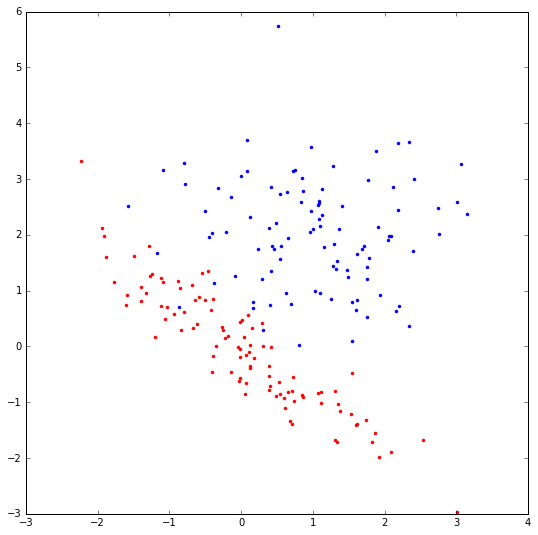

In [92]:
%matplotlib inline
import numpy as np
m1 = [0.,0.]
s1 = [[1,-0.9],[-0.9,1]]
m2 = [1.,2.]
s2 = [[1,0],[0,1]]
c1 = np.random.multivariate_normal(m1,s1,100)
c2 = np.random.multivariate_normal(m2,s2,100)


x= np.r_[c1,c2]
y= np.r_[-np.ones(c1.shape[0]),np.ones(c2.shape[0])]


print x.shape,y.shape
import matplotlib.pyplot as plt


plt.plot(c1[:,0],c1[:,1],'r.')
plt.plot(c2[:,0],c2[:,1],'b.')


plt.gcf().set_size_inches((9,9))

<div class = "alert alert-success" style = "border-radius:10px">**EXERCISE: ** Run the code for the hard margin SVM. Describe the result.</div>

In [93]:
#Your code here

from cvxpy import *
import numpy

d = x.shape[1]
N = x.shape[0]

# Construct the problem.
a = Variable(d)
b = Variable()
error = norm(a)/2.
obj = Minimize(error)
constraints = [mul_elemwise(y,x*a+b)>=1]
prob = Problem(obj,constraints)
prob.solve()

inf

<div class = "alert alert-success" style = "border-radius:10px">**EXERCISE: ** Code the soft margin SVM. Describe the result when changing parameter C.</div>


Xiaoxia: allow us to travel on the pareto's optimal surface

In [99]:
#your code


from cvxpy import *
import numpy

d = x.shape[1]
N = x.shape[0]
c = 1.

# Construct the problem.
a = Variable(d)
b = Variable()
epsilon = Variable(N)    # pareto's optimal: chi


error = norm(a) + c*sum(epsilon)
obj = Minimize(error)
constraints = [mul_elemwise(y,x*a+b)>=1-epsilon,epsilon>=0]
prob = Problem(obj,constraints)
prob.solve()


21.029746236965078

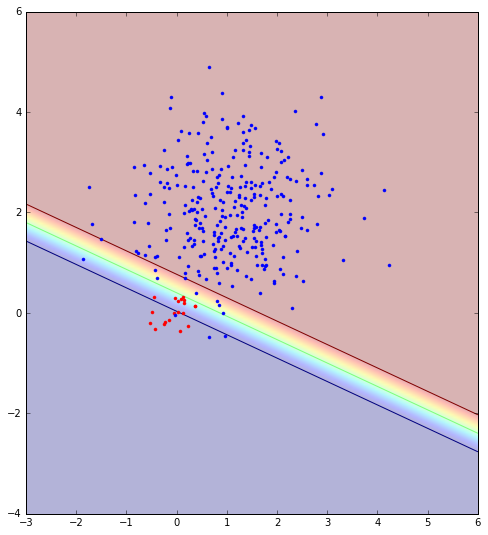

In [100]:
xx,yy = np.meshgrid(np.linspace(-3,6,200),np.linspace(-4,6,200))
viz=np.c_[xx.ravel(),yy.ravel()]


z = np.dot(viz,a.value)+b.value

plt.plot(c1[:,0],c1[:,1],'r.')
plt.plot(c2[:,0],c2[:,1],'b.')
plt.gca().set_xlim([-3.,6.])
plt.gca().set_ylim([-4.,6.])
plt.imshow(z.reshape((200,200)), interpolation='bilinear', origin='lower', extent=(-3,6,-4,6),alpha=0.3, vmin=-1, vmax=1)
plt.contour(xx,yy,z.reshape((200,200)),[-1.,0.,1.])

plt.gcf().set_size_inches((9,9))

<div class = "alert alert-success" style = "border-radius:10px">**EXERCISE: ** Consider the formulation of the soft-margin SVM in a separable case. If one sets parameter $C$ to 0, what is the resutl? do we recover the hard-margin SVM? </div>

It classifies everything as one class. because now Xi (epsilon) could be anything, (all errors are accepted). 

<div class="alert alert-info">**Take home ideas:**
<ul>
<li> Classical SVM fits a hyperplane separating boundary. </li>
<li> The hyperplane is defined to achieve the maximum margin. </li>
<li> If the problem is not linearly separable a new term related to the misclassification performance is introduced that trades-off with the margin. This trade-off is governed by parameter $C$ (or $\nu$ in $\nu$-SVM). </li>
</ul>
</div>

<div class = "alert alert-danger" style = "border-radius:10px">**DELIVERABLE: ** We want to modify the soft-margin SVM to be able to accomodate unbalanced data. Describe how to change the formulation such that we can control the balance of the errors from each class. Code an example and apply it to the following problem.</div>

(320, 2) (320,)


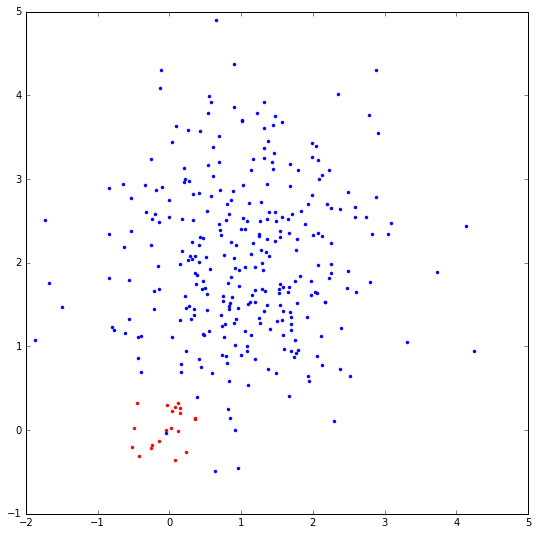

In [96]:
%matplotlib inline
import numpy as np
m1 = [0.,0.]
s1 = [[0.05,0],[0,0.05]]
m2 = [1.,2.]
s2 = [[1,0],[0,1]]
c1 = np.random.multivariate_normal(m1,s1,20)
c2 = np.random.multivariate_normal(m2,s2,300)


x= np.r_[c1,c2]
y= np.r_[-np.ones(c1.shape[0]),np.ones(c2.shape[0])]


print x.shape,y.shape
import matplotlib.pyplot as plt


plt.plot(c1[:,0],c1[:,1],'r.')
plt.plot(c2[:,0],c2[:,1],'b.')


plt.gcf().set_size_inches((9,9))

In [101]:
# clase weight for SVM.